# Project: Investigate No-show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* **ScheduledDay** indicates the day the patient set up their appointment.
* **Neighborhood** indicates the location of the hospital.
* **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

> **Note:** The encoding of the last column, `Yes` indicates that the patient did not showed up to their appointment, and `No` if they did show up. 

I will attempt to understand what factors affects or contribute to the patient attendance to the scheduled appointment?

### Questions for Analysis

1. Does the patient age associated with the no-show?
2. Does the Hypertension associated with the no-show?
3. Does sending SMS affects the no-show?
4. Does the Alcoholism associated with the no_show?

In [1]:
# Importing all the packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The following allows our visualizations to get plotted inline with the notebook.
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the dataset, check for cleanliness, and then trim and clean our dataset for analysis.


### General Properties

Comments are used in the following operations in each cell to easily understand the purpose of each code cell.

In [2]:
# Loading our dataset and printing out the first five lines.
df= pd.read_csv('Database_No_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Inspecting data operations
The following steps we will perform **operations** to **explore** our dataset in the following order:
1. Inspecting the number of patients in the dataset.
2. Inspecting any duplicated records in the dataset to drop.
3. Inspecting the available data types and any instances of missing or possibly errant data.
4. Inspecting the statistical characteristics of our dataset for insights.

In [3]:
# Inspecting the number of patient records within our dataset.
df.shape

(110527, 14)

> Number of rows = 110527 which is the total patiets number.

In [4]:
# Finding out any duplicated records in the dataset.
sum(df.duplicated(subset=None, keep='first'))

0

> There are no duplicated records in the dataset to drop.

In [5]:
# Inspecting the available data types and missing data instances within our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> #### Observations
> 1. There are no `null` values in the dataset.
> 2. No-show column data type is `object` instead of numeric values for later analysis.

In [6]:
# Converting No-show column to numeric values.
df['No-show'].replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


> **No-show** column data coverted to numeric values `(Show == 0)` & `(No-show == 1)`.

In [7]:
# Getting a statistical overview of our dataset.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='stats'></a>
> #### Observations
> 1. The average patient age is **37 years old**.
> 2. The minimum patient age has a wrong entry of **-1 year old** since `(age > 0)`.
> 3. The maximum patient age is **115 years old**.
> 4. **09%** of patients are enrolled to Brasilian welfare program Bolsa Família.
> 5. **19%** of patients are diagnosed with **Hypertension**.
> 6. **07%** of patients are **Diabetic**.
> 7. **03%** of the patients are **Alcoholics** and **02%** are **Handicapped**.
> 8. **32%** of the patients recieved **SMS** reminder with the appointment.
> 9. **20%** of patients did not show up to their appointment.

In [8]:
# Inspecting the instances that patients (age < 0).
sum(df['Age'] < 0)

1

> There is on record in the dataset where the age of patient is -1.

### Data Cleaning 

**1. Dropping the columns that wont assist us further in the analysis.**

In [9]:
# Here I am dropping the columns that wont assist further in the analysis process.
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], 
        axis = 1, inplace=True )
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


**2. Renaming `No-show` column to `No_show` for uniformity and ease of use.**

In [10]:
# Renaming columns for uniformity and ease of use further in the analysis coding.
df.columns =['gender', 'age', 'scholarship', 'hypertension', 'diabetes',
             'alcoholism', 'handicap', 'sms', 'no_show']
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms,no_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Visualizing all aspects of the dataset in histograms.

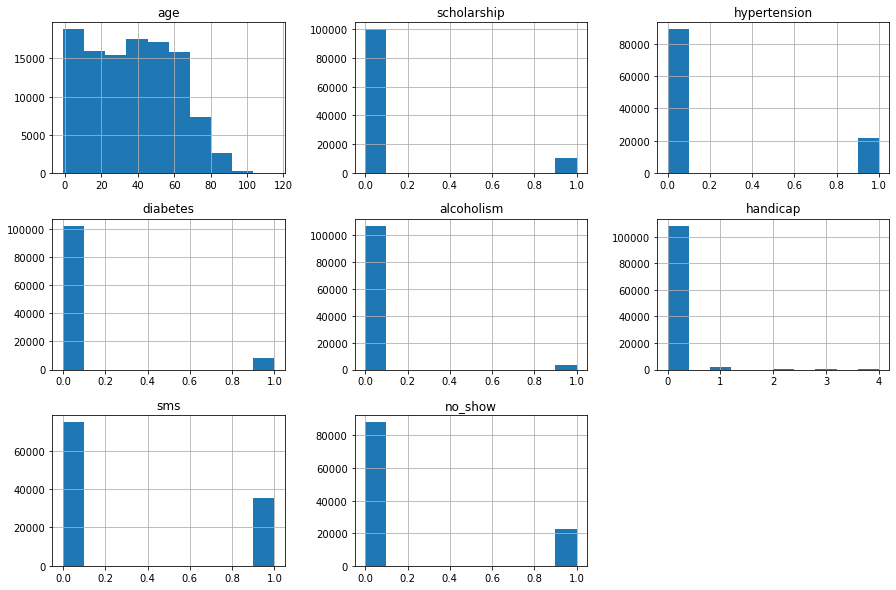

In [11]:
# Here we are visualising the full data set in histograms for an overview.
df.hist(figsize= (15, 10)); 

> The above histograms only confirmed the statistical <a href="#stats">observations</a> visually.

### Does the patient age associated with the no-show?
**Assumption:** The older the patients are, the more likely they will miss their appointment.

In [12]:
# Creating dependent variables to use throughout the analysis
show_patients = df.no_show == 0 
no_show_patients = df.no_show == 1

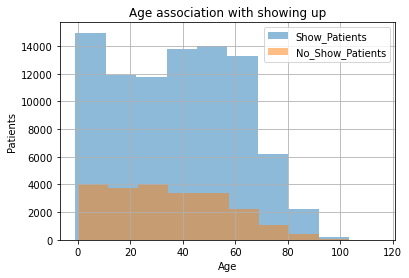

In [13]:
# Here we will plot the relationship between the patient age and no_show
df.age[show_patients].hist(alpha=0.5,label='Show_Patients')
df.age[no_show_patients].hist(alpha=0.5,label='No_Show_Patients');
plt.legend();
plt.title('Age association with showing up')
plt.xlabel('Age')
plt.ylabel('Patients');

> #### Observation
**This case meets my assumption.**\
There is a strong realtionship between the patient age and showing up to the appointment, which clearly indicates that the older the patient is the more likely he/she would not show for their appointment.


### Does the Hypertension associated with the no-show?
**Assumption:** Patients diagnosed with `Hypertension` are more likely to miss their appointment.

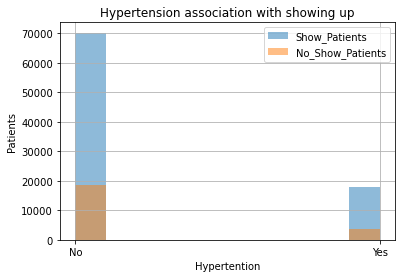

In [14]:
# Here we will plot the relationship between the hypertension and no_show
df.hypertension[show_patients].hist(alpha=0.5,label='Show_Patients')
df.hypertension[no_show_patients].hist(alpha=0.5,label='No_Show_Patients');
plt.legend();
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.title('Hypertension association with showing up')
plt.xlabel('Hypertention')
plt.ylabel('Patients');

> #### Observation
**This case clearly contradicts my assumption.**\
The plot clearly indicates that more `Hypertension` patients are showing up for their appointment.

### Does sending SMS affects the no-show?
**Assumption:** Patients who recieved SMS are more likely to show up for their appointment.

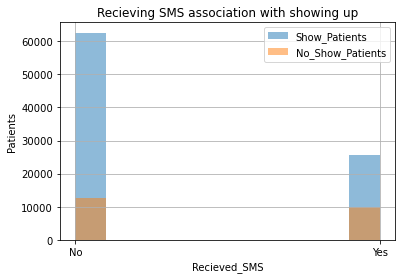

In [15]:
# Here we will plot the relationship between recieving SMS and no_show
df.sms[show_patients].hist(alpha=0.5,label='Show_Patients')
df.sms[no_show_patients].hist(alpha=0.5,label='No_Show_Patients');
plt.legend();
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.title('Recieving SMS association with showing up')
plt.xlabel('Recieved_SMS')
plt.ylabel('Patients');

> #### Observation
**This case meets my assumption.**\
The plot clearly indicates that more patients who received SMS are showing up for their appointment. But, sending SMS does not show as a necessary tool in confirming that the patient would show up.

### Does the Alcoholism associated with the no_show?
**Assumption:** Alcoholic patients are more likely to miss their appointment.

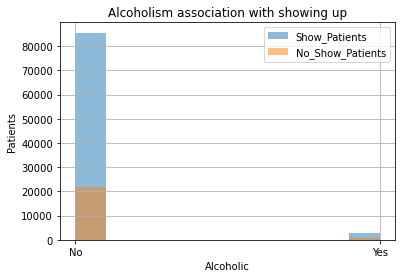

In [16]:
# Here we will plot the relationship between Alcoholism and no_show
df.alcoholism[show_patients].hist(alpha=0.5,label='Show_Patients')
df.alcoholism[no_show_patients].hist(alpha=0.5,label='No_Show_Patients');
plt.legend();
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.title('Alcoholism association with showing up')
plt.xlabel('Alcoholic')
plt.ylabel('Patients');

> #### Observation
**This case clearly contradicts my assumption.**\
The plot clearly indicates that more `Alcoholic` patients are showing up for their appointment.

<a id='conclusions'></a>
## Conclusions

1. Majority of patiets are showing up to the ses appointment with `80% show` against `20% no_show`.
2. `Age` is a major factor affecting patients attendance for the set appointment.
3. Sending `SMS` is not a necessary tool in confirming that the patient would show up.
4. More `Hypertension` and `Alcohlic` patients are showing up for the set appointment.
5. Having almost all the independent variables in `Yes` or `No` is resulting to unclear relationship between the independet and dependent variables.

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1